<a href="https://colab.research.google.com/github/rafinika/ds-python-fundamental/blob/main/4-Visualizing-the-History-of-Nobel-Prize-Winners/Visualizing_the_History_of_Nobel_Prize_Winners.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project: Visualizing the History of Nobel Prize Winners**

The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the nobel.csv file.

In this project, you'll get a chance to explore and answer several questions related to this prizewinning data. And we encourage you then to explore further questions that you're interested in!

**Task**

Analyze Nobel Prize winner data and identify patterns by answering the following questions:

1.   What is the most commonly awarded gender and birth country?

*   Store your answers as string variables `top_gender` and `top_country`.
2.   Which decade had the highest ratio of US-born Nobel Prize winners to total winners in all categories?

*   Store this as an integer called `max_decade_usa`.
3.   Which decade and Nobel Prize category combination had the highest proportion of female laureates?

*   Store this as a dictionary called `max_female_dict` where the decade is the key and the category is the value. There should only be one `key:value` pair.
4.   Who was the first woman to receive a Nobel Prize, and in what category?

*   Save your string answers as `first_woman_name` and `first_woman_category`.
5.   Which individuals or organizations have won more than one Nobel Prize throughout the years?
*   Store the full names in a list named `repeat_list`.

Answer 1a. Most commonly awarded gender is: Male
Answer 1b. Most commonly awarded birth country is: United States of America
Answer 2. Decade that had highest US-born Nobel Price Winners is: 2000


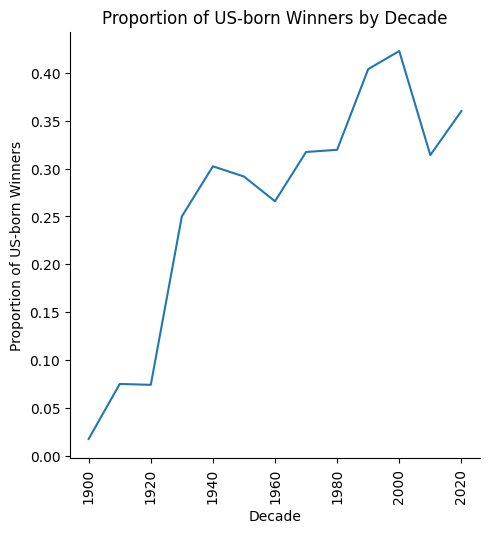

Answer 3. Decade and Nobel Prize category with highest proportion of female laureates is: {(2020, 'Literature'): 0.5}


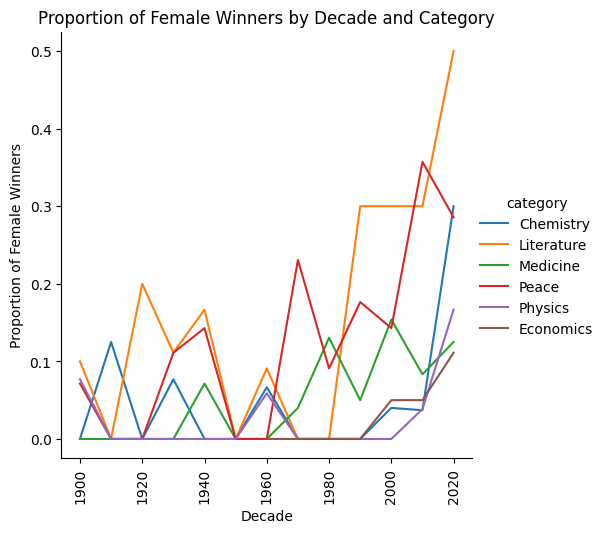

Answer 4. First female winner is: Marie Curie, née Sklodowska in Physics
Answer 5. List of repeat winners is: ['Comité international de la Croix Rouge (International Committee of the Red Cross)', 'Frederick Sanger', 'John Bardeen', 'Linus Carl Pauling', 'Marie Curie, née Sklodowska', 'Office of the United Nations High Commissioner for Refugees (UNHCR)']


In [15]:
# Load required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Read csv
df = pd.read_csv('/content/drive/MyDrive/colab_notebooks/Visualizing_the_History_of_Nobel_Prize_Winners/nobel.csv')

# Most commonly awarded gender and birth country
top_gender = df['sex'].value_counts().idxmax()
top_country = df['birth_country'].value_counts().idxmax()
print(f'Answer 1a. Most commonly awarded gender is: {top_gender}')
print(f'Answer 1b. Most commonly awarded birth country is: {top_country}')

# Decade with highest ratio of US-born Nobel Prize
df['decade'] = (np.floor(df['year']/10)*10).astype(int)
df['us_born'] = df['birth_country'] == 'United States of America'
df_us_ratio = df.groupby('decade')['us_born'].mean()
max_decade_usa = df_us_ratio.idxmax()
print(f'Answer 2. Decade that had highest US-born Nobel Price Winners is: {max_decade_usa}')
sns.relplot(data=df, x='decade', y='us_born', kind='line', errorbar=None)
plt.xticks(rotation=90)
plt.xlabel('Decade')
plt.ylabel('Proportion of US-born Winners')
plt.title('Proportion of US-born Winners by Decade')
plt.show()

# Decade and Nobel Prize category with highest proportion of female laureates
df['female_winner'] = df['sex'] == 'Female'
df_female_ratio = df.groupby(['decade', 'category'])['female_winner'].mean()
max_female = df_female_ratio.max()
max_female_dict = df_female_ratio[df_female_ratio == max_female].to_dict()
print(f'Answer 3. Decade and Nobel Prize category with highest proportion of female laureates is: {max_female_dict}')
sns.relplot(data=df, x='decade', y='female_winner', hue='category', kind='line', errorbar=None)
plt.xticks(rotation=90)
plt.xlabel('Decade')
plt.ylabel('Proportion of Female Winners')
plt.title('Proportion of Female Winners by Decade and Category')
plt.show()

# First female winner
df_female = df[df['sex'] == 'Female']
first_woman = df_female.sort_values('year').iloc[0]
first_woman_name = first_woman['full_name']
first_woman_category = first_woman['category']
print(f'Answer 4. First female winner is: {first_woman_name} in {first_woman_category}')

# Repeat winners
repeat_winners = df.groupby('full_name')['year'].count()
repeat_list = repeat_winners[repeat_winners > 1].index.tolist()
print(f'Answer 5. List of repeat winners is: {repeat_list}')